#### mining capitalizations, with timeseries ties to pricing
using a study where mp and capitalizatoins are collected together, and stored in the same series. 

In [11]:
# for Wed Aug 03 2022 11_12_47 GMT-0700 (Pacific Daylight Time)-CAPS.csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = np.genfromtxt('Wed Aug 03 2022 11_12_47 GMT-0700 (Pacific Daylight Time)-CAPS.csv', delimiter=';',names=True, dtype=None, encoding='UTF')
mt = {col: np.array([row[i] for row in data])for i, col in enumerate(data.dtype.names)}
#array_dict

In [15]:
# for Wed Aug 03 2022 11_12_47 GMT-0700 (Pacific Daylight Time)-CAPS.csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
mt = pd.read_csv("Wed Aug 03 2022 11_12_47 GMT-0700 (Pacific Daylight Time)-CAPS.csv")
mt

,bc,ac,tbv,tav,time,mp
0,7079573.19,2.282991e+08,742914.44,358954.73,1659550372208,23.94
1,7068433.55,2.282975e+08,742447.81,358886.23,1659550375399,23.94
2,7049533.53,2.283120e+08,741658.28,359494.94,1659550377874,23.94
3,7063803.05,2.283159e+08,742254.86,359657.05,1659550380949,23.94
4,7043671.56,2.283179e+08,741410.16,359738.76,1659550384045,23.93
...,...,...,...,...,...,...
751,5828254.41,2.285288e+08,691118.00,372755.06,1659624680938,23.27
752,5884793.69,2.285205e+08,693448.60,372329.01,1659625120917,23.34
753,5913734.67,2.285461e+08,694482.47,373279.27,1659625561271,23.35
754,5890414.85,2.285529e+08,693841.72,373885.18,1659626003085,23.26


<AxesSubplot:xlabel='time', ylabel='mp'>

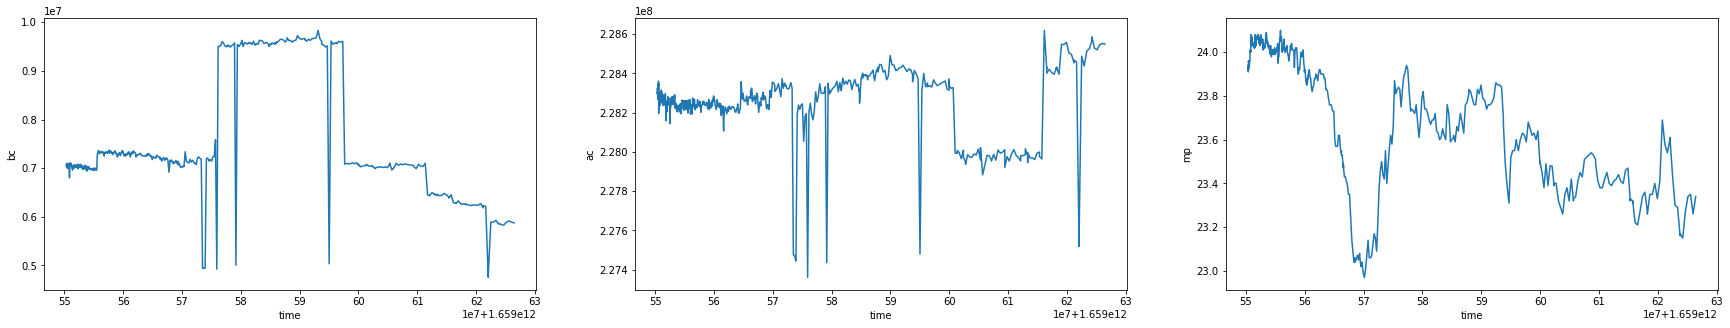

In [16]:
fig, axs = plt.subplots(ncols=3, figsize=(30,5))

sns.lineplot(x="time", y="bc", data=mt, ax=axs[0])
sns.lineplot(x="time", y="ac", data=mt, ax=axs[1])
sns.lineplot(x="time", y="mp", data=mt, ax=axs[2])

#### Associating capitalization types and price 

buy bid capitalization and price

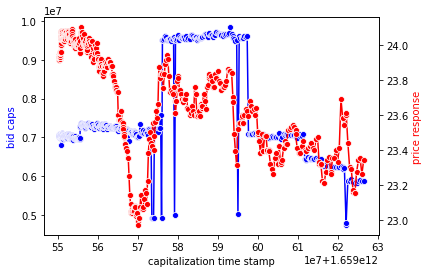

In [19]:
# These lines generate the data to be plotted
y = mt['bc'].to_numpy()#convert to array
x = mt['time'].to_numpy()
y1 = mt['mp'].to_numpy()

fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

#sns.barplot(x = x, y = y, ax = ax1, color = 'blue') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = x, y = y1, marker = 'o', color = 'red', ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = x, y = y, marker = 'o', color = 'blue', ax = ax1) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('capitalization time stamp')
ax1.set_ylabel('bid caps', color='b')
ax2.set_ylabel('price response', color='r')


plt.show(); # shows the plot. 

ask capitalization and price

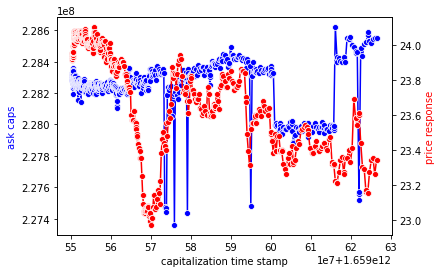

In [20]:
# These lines generate the data to be plotted
y = mt['ac'].to_numpy()#convert to array
x = mt['time'].to_numpy()
y1 = mt['mp'].to_numpy()

fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

#sns.barplot(x = x, y = y, ax = ax1, color = 'blue') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = x, y = y1, marker = 'o', color = 'red', ax = ax2) # plots the second set, and sets to ax2. 
sns.lineplot(x = x, y = y, marker = 'o', color = 'blue', ax = ax1) # plots the second set, and sets to ax2. 


# these lines add the annotations for the plot. 
ax1.set_xlabel('capitalization time stamp')
ax1.set_ylabel('ask caps', color='b')
ax2.set_ylabel('price response', color='r')


plt.show(); # shows the plot. 

#### regression among bid and ask caps, to midpoint price

linearity bc | ac

In [23]:
from sklearn import linear_model

X = mt[['bc']]
Y = mt['ac']
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print(regr.coef_)

[0.05855706]


linearity, bc | mp

In [24]:
from sklearn import linear_model

X = mt[['bc']]
Y = mt['mp']
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print(regr.coef_)

[7.77690689e-09]


linearity, ac | mp

In [25]:
from sklearn import linear_model

X = mt[['ac']]
Y = mt['mp']
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print(regr.coef_)

[1.80117496e-07]


#### next steps: 
plot ac & bc together, then do a third series on y1, with mp. Which line closest relates to mp? Plot bc and ac together, then insert a mean trend line to represent the e1:e2 median. Where is their middle ground? 

magnitude of both ac and bc in one chart, with price alongside !]https://seaborn.pydata.org/generated/seaborn.lineplot.html]